In [38]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

In [40]:
lefthanded_data = pd.read_csv(r'C:\Users\pooji\OneDrive\Documents\Left handed data\data.csv')

In [41]:
lefthanded_data

,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906
...,...,...,...
72,82,7.350204,4.874899
73,83,6.471204,5.672536
74,84,6.510858,5.774881
75,85,7.337968,7.051459


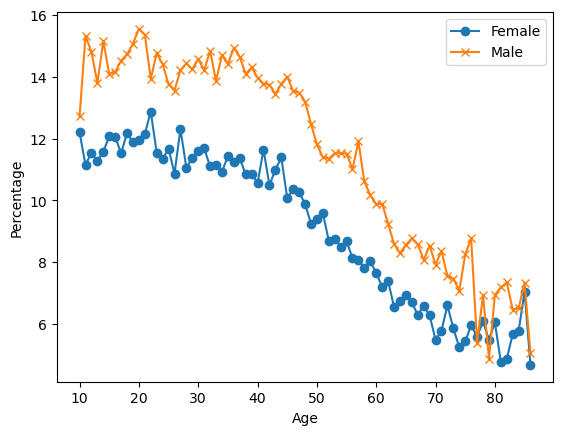

In [86]:
# scatter plot MALE and FEMALE vs Age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(lefthanded_data.Age, lefthanded_data.Female,label='Female', marker = 'o') # plot "Female" vs. "Age"
ax.plot(lefthanded_data.Age, lefthanded_data.Male, label='Male', marker = 'x') # plot "Male" vs. "Age"

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(loc="upper right")
plt.show()

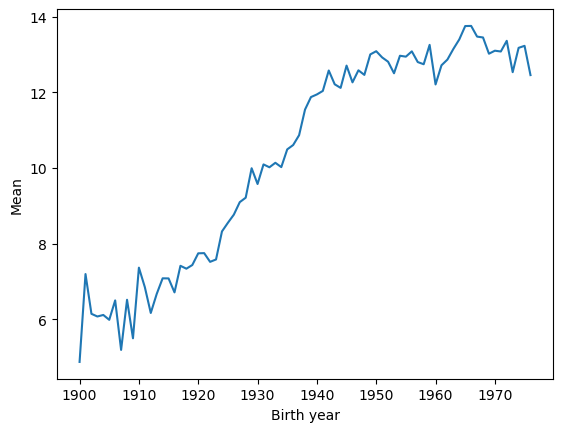

In [88]:
# scatter plot Birth year vs Mean left hand data
lefthanded_data['Birth_year'] = 1986 - lefthanded_data.Age
lefthanded_data['Mean_lh'] = (lefthanded_data.Male+lefthanded_data.Female)/2

fig, ax = plt.subplots()
ax.plot(lefthanded_data.Birth_year, lefthanded_data.Mean_lh) # plot 'Mean_lh' vs. 'Birth_year'

plt.xlabel('Birth year')
plt.ylabel('Mean')


plt.show()

In [93]:
import numpy as np
def P_lh_given_A(ages_of_death, study_year = 1990):
""" P(Left-handed | age of death), calculated based on the reported rates of left-handedness.
Inputs: age of death, study_year
Returns: probability of left-handedness given that a subject died in `study_year` at age `age_of_death` """
    
# Use the mean of the 10 neighbouring points for rates before and after the start 
early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean()
late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    
youngest_age = study_year - 1986 + 10 # the youngest age in the NatGeo dataset is 10
oldest_age = study_year - 1986 + 86 # the oldest age in the NatGeo dataset is 86
    
P_return = np.zeros(ages_of_death.shape)  # create an empty array to store the results
# extract rate of left-handedness for people of age age_of_death
P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
 
return P_return

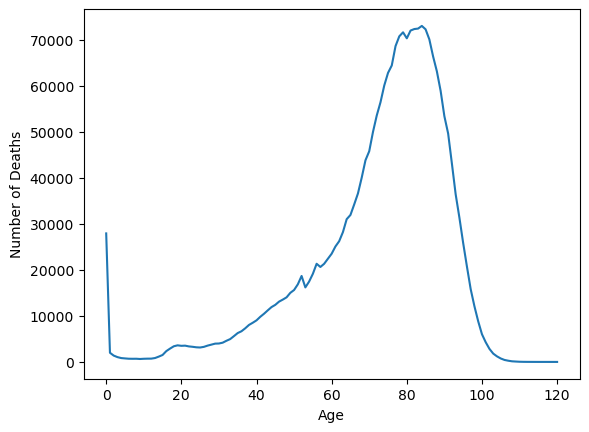

In [91]:
# Death distribution data for the United States in 1999

death_distribution_data = pd.read_csv(r'C:\Users\pooji\OneDrive\Documents\Left handed data\data2.tsv', sep='\t', skiprows=[1])
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])

fig, ax = plt.subplots()
ax.plot(death_distribution_data['Age'], death_distribution_data['Both Sexes']) # plot 'Both Sexes' vs. 'Age'
plt.xlabel('Age')
plt.ylabel('Number of Deaths')

plt.show()

In [65]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    P_lh = P(LH | Age of death) P(Age of death) + P(LH | not A) P(not A) = sum over ages 
    Input: dataframe of death distribution data
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes']*P_lh_given_A(death_distribution_data['Age'], study_year)
    p = np.sum(p_list)
    return p/np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people in distribution
P_lh(death_distribution_data)


0.07766387615350638

In [66]:
#for left handers
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

In [67]:
#for right handers 
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1- P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so these sum to 1
    P_rh_A = 1-P_lh_given_A(ages_of_death, study_year) # these also sum to 1 
    return P_rh_A*P_A/P_right

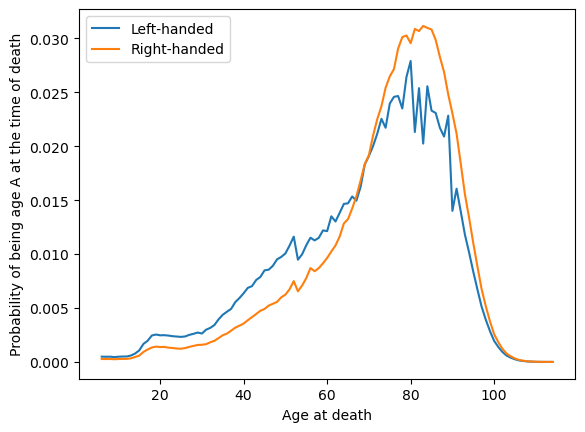

In [90]:
#plotting the distribution of conditional probablities
ages = np.arange(6,115,1)

left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = "Right-handed")
plt.xlabel('Age at death')
plt.ylabel('Probability of being age A at the time of death')
plt.legend(loc="upper left")

plt.show()

In [73]:
#Average age of left handers and right handers at death
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))



In [74]:
>>> print(round(average_lh_age,1))

67.2


In [75]:
>>> print(round(average_rh_age,1))

72.8


In [76]:
>>> print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")

The difference in average ages is 5.5 years.


In [83]:
#Age gap expected if the test was done in 2018
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, study_year = 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, study_year = 2018)
    
average_lh_age_2018 =  np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 =  np.nansum(ages*np.array(right_handed_probability_2018))

In [84]:
>>> print("The difference in average ages is " + str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The difference in average ages is 2.3 years.
